<a href="https://colab.research.google.com/github/devadethan452/ICT.DSA.DEVADETH/blob/main/TITANIC_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment


In [21]:
titanic = pd.read_csv('/content/titanic_dataset.csv')

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index **column**

In [23]:
titanic.set_index('PassengerId', inplace=True)

In [24]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **3. Check the basic details of the dataset**

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [26]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
titanic.shape

(891, 11)

# **4. Fill in all the missing values present in all the columns in the dataset**

Text(0, 0.5, 'FREQUENCY')

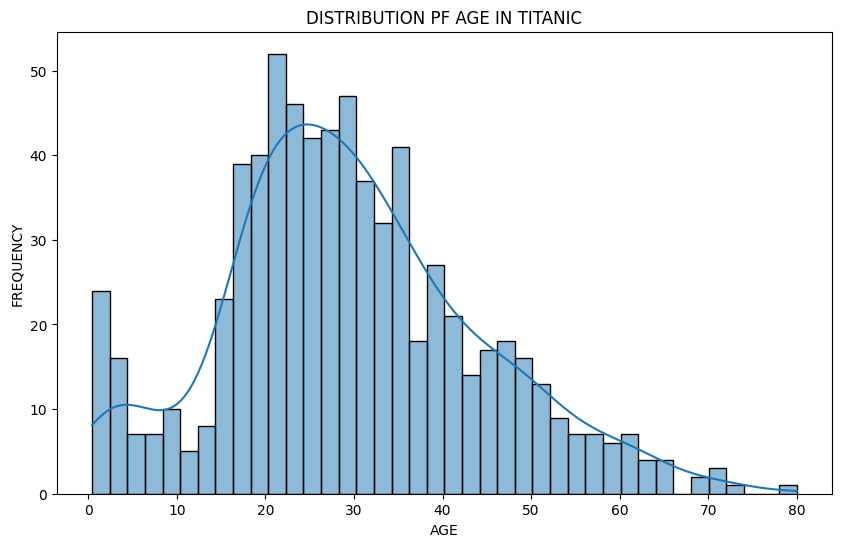

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(titanic['Age'],kde=True , bins=40)
plt.title('DISTRIBUTION PF AGE IN TITANIC')
plt.xlabel('AGE')
plt.ylabel('FREQUENCY')

In [29]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

there's no need to fill the missing values in the columns 'Cabin' & 'Embarked'.

In [30]:
titanic.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


# **5. Check and handle outliers in at least 3 columns in the dataset**


<Axes: ylabel='Age'>

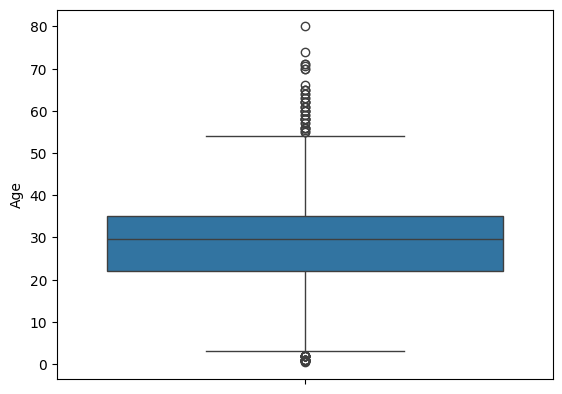

In [31]:
sns.boxplot(titanic['Age'])

<Axes: ylabel='SibSp'>

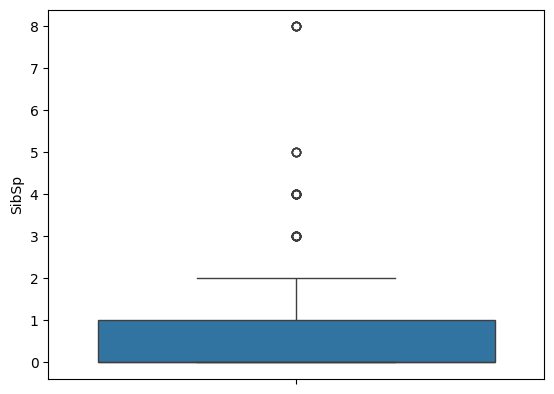

In [32]:
sns.boxplot(titanic['SibSp'])

there's no need to handle the outlier in 'Age' & 'SibSp' column .

<Axes: ylabel='Fare'>

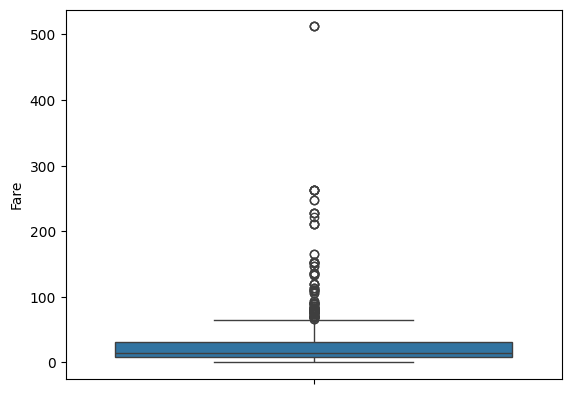

In [33]:
sns.boxplot(titanic['Fare'])

In [34]:
ind = titanic['Fare']>400
titanic.loc[ind].index

Index([259, 680, 738], dtype='int64', name='PassengerId')

In [35]:
titanic.drop([259, 680, 738],inplace = True)

In [36]:
titanic.shape

(888, 11)

# **6. Do min max scaling on the feature set (Take ‘Survived’ as target)**


In [59]:
x = titanic.drop('Survived', axis = 1)

In [60]:
x = x.drop('Name', axis = 1)

In [61]:
x = x.drop('Ticket', axis = 1)

In [62]:
x = x.drop('Cabin', axis = 1)

In [66]:
x = x.drop('Embarked', axis = 1)

In [79]:
y = titanic['Survived']

In [80]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,1,22.0,1,0,7.2500
2,1,0,38.0,1,0,71.2833
3,3,0,26.0,0,0,7.9250
4,1,0,35.0,1,0,53.1000
5,3,1,35.0,0,0,8.0500


In [81]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])

In [83]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,1,22.0,1,0,7.2500
2,1,0,38.0,1,0,71.2833
3,3,0,26.0,0,0,7.9250
4,1,0,35.0,1,0,53.1000
5,3,1,35.0,0,0,8.0500


In [84]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range = (0,1))

In [85]:
x1 = min_max.fit_transform(x)

In [86]:
type(x1)

numpy.ndarray

In [87]:
x1 = pd.DataFrame(x1, columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])

In [89]:
type(x1)

pandas.core.frame.DataFrame

In [90]:
x1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,1.0,0.271174,0.125,0.0,0.027567
1,0.0,0.0,0.472229,0.125,0.0,0.271039
2,1.0,0.0,0.321438,0.000,0.0,0.030133
3,0.0,0.0,0.434531,0.125,0.0,0.201901
4,1.0,1.0,0.434531,0.000,0.0,0.030608


In [91]:
x = x.drop(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],axis = 1)

In [92]:
x = pd.concat([x,x1],axis = 1)

In [93]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
1,0.0,0.0,0.472229,0.125,0.0,0.271039
2,1.0,0.0,0.321438,0.000,0.0,0.030133
3,0.0,0.0,0.434531,0.125,0.0,0.201901
4,1.0,1.0,0.434531,0.000,0.0,0.030608
5,1.0,1.0,0.367921,0.000,0.0,0.032161
